<a href="https://colab.research.google.com/github/KiranVarghese25/AML_lab/blob/main/Lab1_AML_2348525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**
The dataset chosen for this lab, is the Telecom Customer Churn Dataset.It consists of the details of the customers who have left the telecom service provider as well as the existing customers.The dataset consists of 21 columns and 7032 rows.


In [239]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [240]:
#loading the dataset
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [241]:
#checking the Datatype of each column
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [242]:
#Removing the unwanted space in the TotalCharges column
data = data.drop(data[data.TotalCharges ==' '].index)

In [243]:
#Converting the dtype of the column 'TotalCharges' from obj to float
data['TotalCharges']=data['TotalCharges'].astype(float)

In [244]:
#nos of rows and columns in the dataset
dat_shape=data.shape
print(f'The nos of colmns is :- ',dat_shape[1],'\nThe nos of rows are:- ',dat_shape[0])

The nos of colmns is :-  21 
The nos of rows are:-  7032


In [245]:
#summary of te dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [246]:
#dropping the unecessary column Cust_ID
data=data.drop(['customerID'],axis=1)

In [247]:
#checking for missing values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [248]:
#checking the dataframe for categorical columns
def check_cat_var(df):
  cat_cols=[]
  for cols in df.columns:
    if df[cols].dtype =='object':
      cat_cols.append(cols)

  return cat_cols


categorical_columns=check_cat_var(data)
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [249]:
#checking the dataframe for numerical columns

def check_num_var(df):
  num_cols=[]
  for cols in df.columns:
    if df[cols].dtype =='float' or df[cols].dtype =='int':
      num_cols.append(cols)

  return num_cols


numerical_cols=check_num_var(data)
numerical_cols.remove('SeniorCitizen')
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [250]:
#Encoding the categorical values
le=LabelEncoder()
for cols in  categorical_columns:
  data[cols]=le.fit_transform(data[cols])


In [251]:
#data after encoding
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


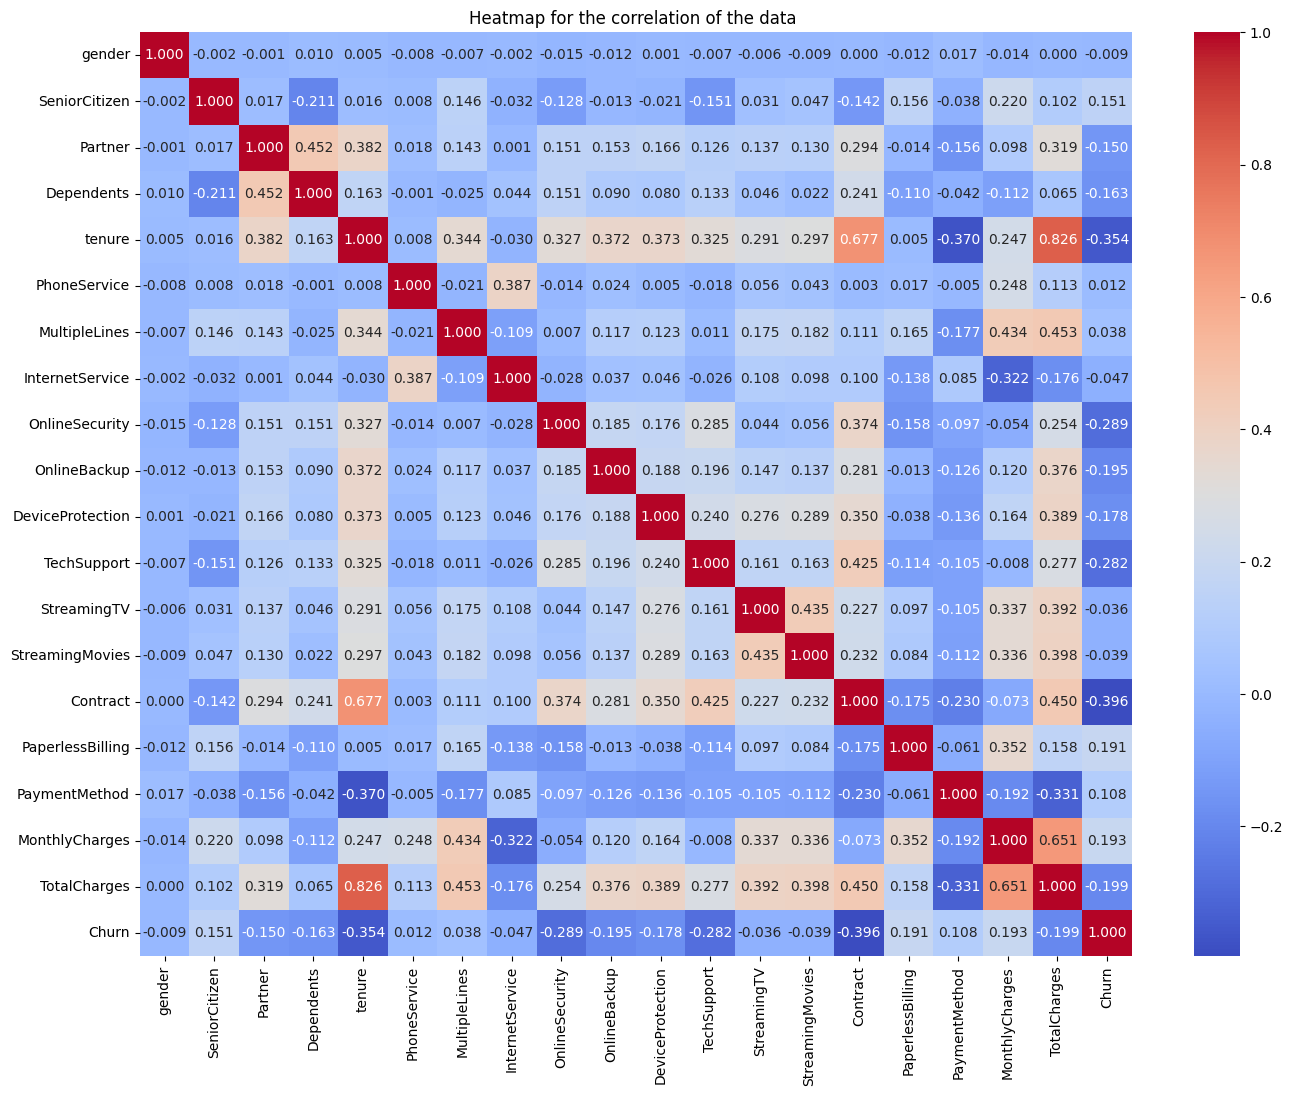

In [252]:
#EDA

#plot the correlation
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Heatmap for the correlation of the data ')
plt.show()

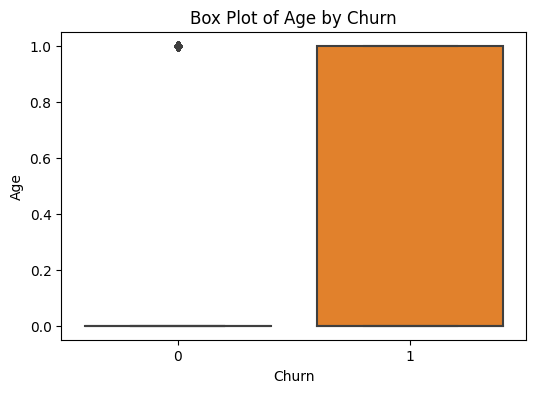

In [253]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='SeniorCitizen', data=data)
plt.title('Box Plot of Age by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

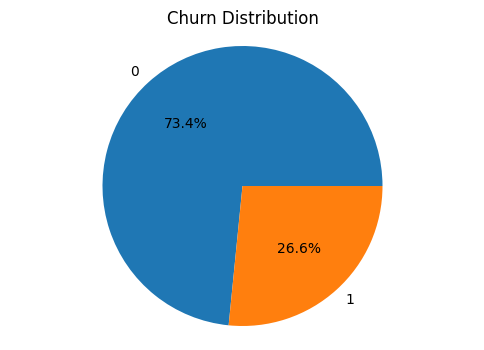

In [254]:
#Percentage of customers churned and exisitng customers

plt.figure(figsize=(6, 4))
plt.pie(data['Churn'].value_counts().values, labels=data['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.axis('equal')

plt.show()


From the above Pie chart we can observe that around 73% of the data/customers in the dataset consists of the details of those customers who have left the service whereas the remianing 26.6% consists of those customers who are still subscribe to the service.

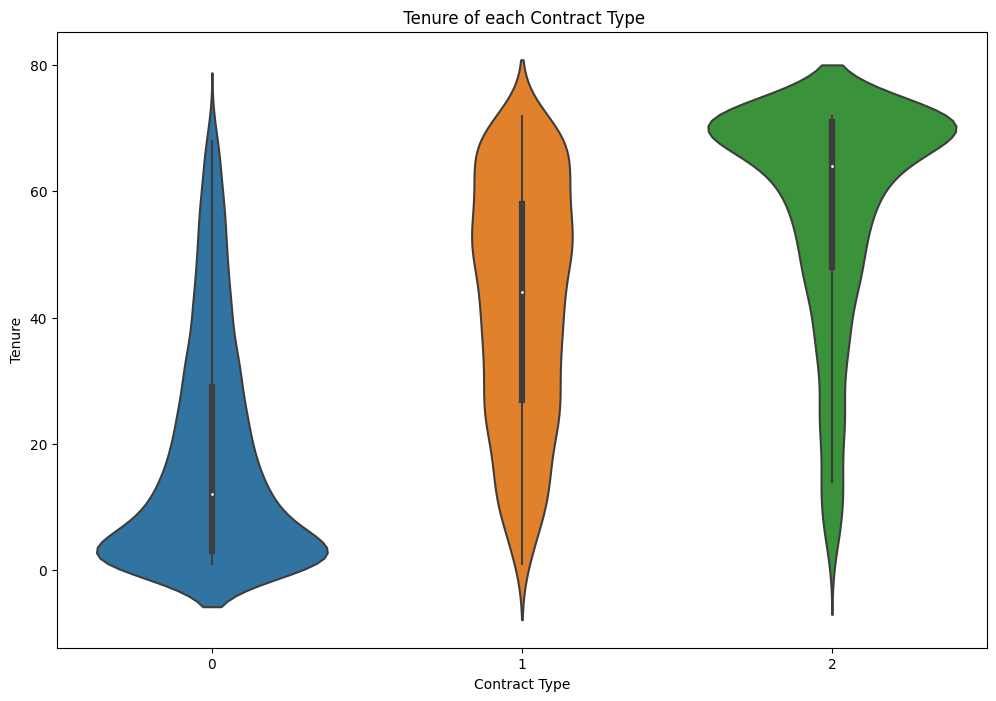

In [255]:
#Contract Vs Tenure
plt.figure(figsize=(12, 8))
sns.violinplot(x='Contract', y='tenure', data=data)
plt.title(' Tenure of each Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Tenure')
plt.show()








The Above graph is a violin chart that represents the count of customers under each contract type.From the Graph we can observe that there are 3 types of contracts offered by the service provider and a majority of the customers have the third type of contract with the service provider.

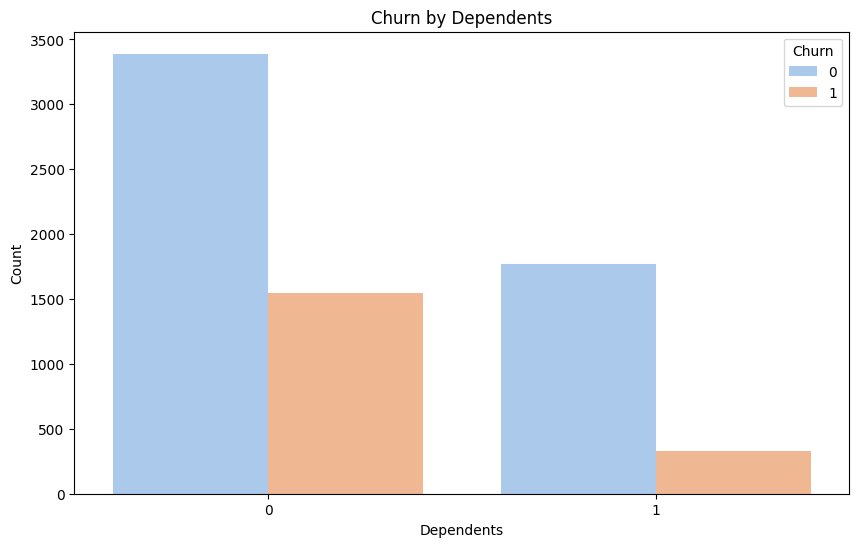

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

The above graph is a representation of count of the customers with dependents and whether they have left the service or not.We can observe that for both  customers without dependents and with dependents are still customers to the service providers.

In [257]:
#normalization
scaler=MinMaxScaler()
data[numerical_cols]=scaler.fit_transform(data[numerical_cols])

In [258]:
#Splitting the dataset
X=data.drop(['Churn'],axis=1)
y=data['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)



In [259]:
#log regression
model=LogisticRegression()
model.fit(X_train,y_train)



LogisticRegression()

In [260]:
#making predictions

#train data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, y_train)
print('The accuracy of the model(Train data):- ',training_data_accuracy)

#test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('The accuracy of the model(Test data):- ',test_data_accuracy)

The accuracy of the model(Train data):-  0.8053636733035352
The accuracy of the model(Test data):-  0.7962085308056872


Note:- As I increased the size of the test data size the accuracy of the test data started to increase,it was at 78% when the spilt was 70% train and 20% test, when the test size was changed to 60% train and 40% test , the accuracy came out to be 80%.

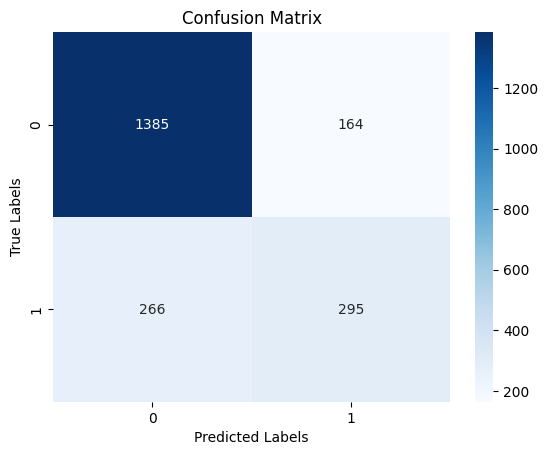

In [261]:
#confusion matrix of the model
pred_label=model.predict(X_test)
true_label=y_test
conf_matrix=confusion_matrix(true_label, pred_label)
#heat map of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()








The above graph is a visual representation of the confusion matrix of the model.From the graph we can observe that the model we can observe that:
1385 samples were correctly predicted as the negative class,
164 samples were incorrectly predicted as the positive class,
266 samples were incorrectly predicted as the neagtive class,
295 samples were correctly predcited as the positive class.

In [262]:
#Decision Tree Regressor

X=data.drop(['TotalCharges','Churn'],axis=1)
y=data['TotalCharges']

In the Dtree Regressor model i have changed my target variable from Churn to TotalCharges as we know that for a regression model the target var is always continous.

In [263]:
#splitting the dataset
Dtree_X_train,Dtree_X_test,Dtree_y_train,Dtree_y_test=train_test_split(X,y,random_state=42,test_size=0.3)

#Model
Dtree_reg=DecisionTreeRegressor()
Dtree_reg.fit(Dtree_X_train,Dtree_y_train)
Dtree_y_pred=Dtree_reg.predict(Dtree_X_test)

In [264]:
#Model Evaluation
Dtree_mean_sq_err=mean_squared_error(Dtree_y_test, Dtree_y_pred)
print('The Mean Squared error of the model is:- ',Dtree_mean_sq_err)

Dtree_mean_abs_err=mean_absolute_error(Dtree_y_test, Dtree_y_pred)
print('The Mean Absolute error of the model is:- ',Dtree_mean_abs_err)

Dtree_r2=r2_score(Dtree_y_test, Dtree_y_pred)
print('The R2 of the model is:- ',Dtree_r2)

The Mean Squared error of the model is:-  0.00018735647214795668
The Mean Absolute error of the model is:-  0.009200612952728041
The R2 of the model is:-  0.9972882571973445


From the above metrics we can conclude that model performs well ,as the r2 sqaure value is closer to one the better fit, so fron the value of r2 we can see that value is almost at 1 indicating a perfict fit.